In [1]:
from sklearn import tree
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.ensemble import RandomForestClassifier

In [95]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [4]:
mushroom_df = pd.read_csv("https://stepik.org/media/attachments/course/4852/training_mush.csv")

In [5]:
mushroom_df.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,2,0,3,1,5,1,0,0,9,1,...,3,7,0,2,1,4,3,5,0,0
1,2,0,4,0,5,1,0,1,10,0,...,7,4,0,2,1,0,7,4,0,1
2,2,0,3,0,2,1,0,0,7,0,...,0,4,0,2,1,2,1,5,1,1
3,0,0,3,0,5,1,1,0,2,0,...,7,7,0,2,2,4,7,3,1,0
4,2,3,3,1,5,1,0,0,10,1,...,3,6,0,2,1,4,2,5,0,0


In [6]:
mushroom_df.isnull().sum()

cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
class                       0
dtype: int64

In [7]:
X_train = mushroom_df.drop(['class'], axis=1)

In [8]:
y_train = mushroom_df['class']

In [9]:
rf = RandomForestClassifier(random_state=0)

In [10]:
params = {'n_estimators': range(10,50,10), 
          'max_depth': range(1,12,2), 
          'min_samples_leaf': range(1,7), 
          'min_samples_split': range(2,9,2)}

In [11]:
grid_search_cv_clf = GridSearchCV(rf, params, cv=3)

In [12]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': range(1, 12, 2),
                         'min_samples_leaf': range(1, 7),
                         'min_samples_split': range(2, 9, 2),
                         'n_estimators': range(10, 50, 10)})

In [13]:
grid_search_cv_clf.best_params_

{'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [14]:
clf = grid_search_cv_clf.best_estimator_

In [15]:
feature_importances = clf.feature_importances_

In [16]:
feature_importances_df = pd.DataFrame({'features': X_train.columns, 'feature_importances': feature_importances})

In [17]:
feature_importances_df.sort_values('feature_importances', ascending=False)

,features,feature_importances
4,odor,0.188376
8,gill-color,0.103861
10,stalk-root,0.103793
19,spore-print-color,0.083564
6,gill-spacing,0.080840
18,ring-type,0.070726
3,bruises,0.070109
7,gill-size,0.068461
12,stalk-surface-below-ring,0.048296
20,population,0.043783


In [18]:
X_test = pd.read_csv("https://stepik.org/media/attachments/course/4852/testing_mush.csv")

In [19]:
X_test.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,3,8,1,3,1,0,0,4,0,...,2,7,7,0,2,1,4,2,3,3
1,5,3,4,1,5,1,0,0,10,1,...,2,6,6,0,2,1,4,3,5,0
2,3,3,4,0,8,1,0,1,0,1,...,2,7,6,0,2,1,0,7,4,4
3,3,2,2,0,7,1,0,1,0,1,...,1,6,7,0,2,1,0,7,4,0
4,3,2,2,0,8,1,0,1,0,1,...,1,6,6,0,2,1,0,7,4,4


In [31]:
y_pred = clf.predict(X_test)

In [32]:
pd.Series(y_pred).value_counts()

0    1055
1     976
dtype: int64

In [33]:
!pip install requests

In [34]:
import zipfile, io, requests

In [35]:
url = "https://stepik.org/media/attachments/course/4852/testing_y_mush.csv.zip"

In [36]:
r = requests.get(url)

In [37]:
z = zipfile.ZipFile(io.BytesIO(r.content))

In [38]:
txtfiles = z.namelist()

In [39]:
unzip_file = z.open(txtfiles[0], 'r', pwd="Cool!Move_forward!".encode('cp850', 'replace'))

In [40]:
y_test = pd.read_csv(unzip_file)

In [41]:
y_test.head()

,class
0,0
1,0
2,1
3,1
4,1


In [42]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [43]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)

In [44]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)


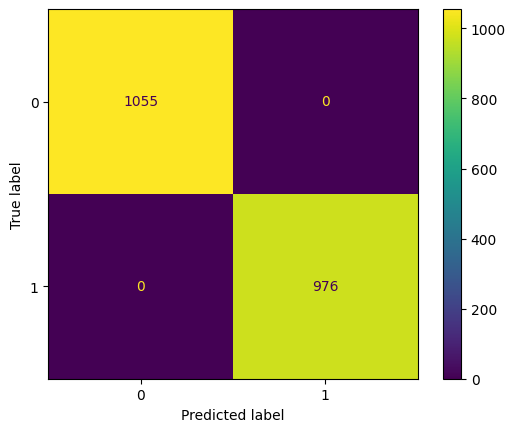

In [45]:
disp.plot()

In [46]:
insect_df = pd.read_csv("https://stepik.org/media/attachments/course/4852/invasion.csv")

In [47]:
insect_df.head()

,class,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,transport,2.190672,6.716633,62.168208,0.347465,158221,44.932446
1,transport,3.453276,8.995909,62.994707,0.590094,385972,41.568300
2,transport,2.432994,6.938691,62.245807,0.329288,446482,40.123467
3,fighter,6.083763,3.019459,18.474555,0.174738,210125,11.384865
4,fighter,12.876769,2.452950,195.805771,0.150446,23109,11.328806


In [48]:
insect_df.isnull().sum()

class                 0
g_reflection          0
i_reflection          0
speed                 0
brightness            0
time_of_observance    0
volume                0
dtype: int64

In [50]:
X_train = insect_df.drop(['class'], axis=1)

In [51]:
y_train = insect_df['class']

In [66]:
clf = RandomForestClassifier(random_state=0)

In [67]:
params = {'n_estimators': range(10,110,10), 
          'max_depth': range(1,12,2), 
          'min_samples_leaf': range(1,7), 
          'min_samples_split': range(2,9,2)}

In [68]:
grid_clf = GridSearchCV(clf, params, cv=5)

In [69]:
grid_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': range(1, 12, 2),
                         'min_samples_leaf': range(1, 7),
                         'min_samples_split': range(2, 9, 2),
                         'n_estimators': range(10, 110, 10)})

In [70]:
clf_trained = grid_clf.best_estimator_

In [71]:
clf_trained

RandomForestClassifier(max_depth=3, n_estimators=10, random_state=0)

In [72]:
new_insects_df = pd.read_csv("https://stepik.org/media/attachments/course/4852/operative_information.csv")

In [73]:
new_insects_df.head()

,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,7.516543,3.916691,513.954279,0.177247,105908,13.267224
1,4.322988,6.967689,63.752970,0.545922,277855,39.833130
2,4.595724,9.098297,62.233948,0.389201,160662,42.014556
3,2.689675,7.964869,62.475495,0.541081,162092,42.056829
4,8.075576,5.169719,336.441261,0.174757,466853,11.779813


In [74]:
pd.Series(clf_trained.predict(new_insects_df)).value_counts()

fighter      675
transport    595
cruiser      230
dtype: int64

In [75]:
clf_trained.feature_importances_

array([0.08272264, 0.12437216, 0.17144063, 0.36380346, 0.        ,
       0.25766112])

In [76]:
pd.DataFrame({'obj': X_train.columns, "importance":clf_trained.feature_importances_}).sort_values("importance", ascending=False)

,obj,importance
3,brightness,0.363803
5,volume,0.257661
2,speed,0.171441
1,i_reflection,0.124372
0,g_reflection,0.082723
4,time_of_observance,0.000000


In [80]:
cosmos_pd = pd.read_csv("https://stepik.org/media/attachments/course/4852/space_can_be_a_dangerous_place.csv")

In [81]:
cosmos_pd.head()

,r,phi,peradventure_index,dustiness,black_hole_is_near,buggers_were_noticed,nearby_system_has_planemo,dangerous
0,169.1,138.0,22.3212,0.706285,0,1,1,1
1,11.1,148.0,1.4652,-0.410512,1,1,1,1
2,274.6,201.0,36.2472,0.756457,1,1,1,1
3,172.8,173.0,22.8096,0.035221,1,1,1,1
4,223.3,222.0,29.4756,0.197271,0,1,1,1


In [82]:
cosmos_pd.isnull().sum()

r                            0
phi                          0
peradventure_index           0
dustiness                    0
black_hole_is_near           0
buggers_were_noticed         0
nearby_system_has_planemo    0
dangerous                    0
dtype: int64

In [96]:
clf = RandomForestClassifier(random_state=0)

In [97]:
params = {'n_estimators': range(10,20,5), 
          'max_depth': range(1,12,2), 
          'min_samples_leaf': range(1,7), 
          'min_samples_split': range(2,9,2)}

In [98]:
grid_clf = RandomizedSearchCV(clf, params, cv=5)

In [99]:
X_train = comsmos_pd.drop(["dangerous"], axis=1)

In [100]:
y_train = cosmos_pd["dangerous"]

In [101]:
grid_clf.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
                   param_distributions={'max_depth': range(1, 12, 2),
                                        'min_samples_leaf': range(1, 7),
                                        'min_samples_split': range(2, 9, 2),
                                        'n_estimators': range(10, 20, 5)})

In [102]:
clf_trained = grid_clf.best_estimator_

In [103]:
pd.DataFrame({'obj': X_train.columns, 
              "importance":clf_trained.feature_importances_}).sort_values("importance", ascending=False)

,obj,importance
5,buggers_were_noticed,0.567619
6,nearby_system_has_planemo,0.407919
4,black_hole_is_near,0.012176
3,dustiness,0.003904
2,peradventure_index,0.003435
0,r,0.003033
1,phi,0.001914
